# Example on Model Selection

## Problem Description

You are given the data 'dat_train.txt' which includes a set of cars with their attributes. Your goal is to build a linear model that considers the price of cars (the first column in the data) as the response of the other car attributes. The homework will be graded based on two parts: 

* (80pt) The following report on model estimation and selection, and 
* (20pt) the prediction performance of your model using a set of test data. Details will be explained as follows.

## Preparation

* You will need numpy and matplotlib, as usual, but also the wonderful packages from [Scikit-Learn](http://scikit-learn.org/)

In [1]:
# use this if you are using ipython notebook, otherwise comment it out
%matplotlib inline 

# loading all packages... #
import numpy as np 
from sklearn import decomposition
from sklearn.model_selection  import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

from sklearn.model_selection import cross_val_score

import matplotlib.pyplot as plt

C:\Users\yren32\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\__init__.py:137: UserWarning: NumPy 1.16.5 or above is required for this version of SciPy (detected version 1.16.1)
  UserWarning)


Note, we've given you several base packages here, but you may need to look at the documentation to find functions better suited to your needs. 

* Next, you will need to import the data, as an array. 
    - Make sure the .txt file is in the same directory/folder as your code. 

In [2]:
data = np.genfromtxt('dat_train.txt')
var=['Price', 'Engine size', 
      'Cylinders', 'HP', 'City MPG', 
      'Highway MPG', 'Weight', 'Wheel base', 
      'Length', 'Width']

In class we talked about Data Preprocessing: The data columns should have zero mean and unit variance. In other words, the data should be centered at the origin and the scales of attributes should not be too different. 

One way to preprocess is to use an appropriate scaling function in the `sklearn.preprocessing` sub-module. You can find the documentation [here](http://scikit-learn.org/stable/modules/preprocessing.html#preprocessing). In the following code, complete the import by erasing the `?` and replacing it with the proper function, after uncommenting the lines.

In [3]:
from sklearn.preprocessing import StandardScaler #import the standard scaler
scaler_func=StandardScaler() # assign standard scaler to a variable "scaler_func"

y = data[:,0] #first columns

# covariates are the other columns. Dealer cost is not included since it correlates too much with the price #
X = data[:,1:] # all the others

scaler_func.fit(data) # train the scaler for use later 
data_scaled = scaler_func.transform(data) # preprocess the data

## Step 0. Visualize your data (10pt)

#### Perform PCA on attributes and plot out all cars on the plan of PC1 and PC2. Tag cars with their prices. (5pt)
* Hint: The documentation on PCA can be found [here](http://scikit-learn.org/stable/modules/decomposition.html#decompositions). Like before, find the appropriate function (this time in the `sklearn.decomposition` submodule) and complete the code below. 

* You may desire to see just how much variance is preserved in 2D space (how "good" you approximation is). you can use `explained_variance_ratio_().cumsum()` if you are using PCA or RandomizedPCA, or `svd.explained_variance_ratio_.sum()` if you are using SVD to calculate the *sum* of explained variance in your projection as a fraction of the total (all PCs will be 100%, so 2 PCs should be something lower. Let's put this in the title of our plot. 

Text(0.5, 0, 'First PC')

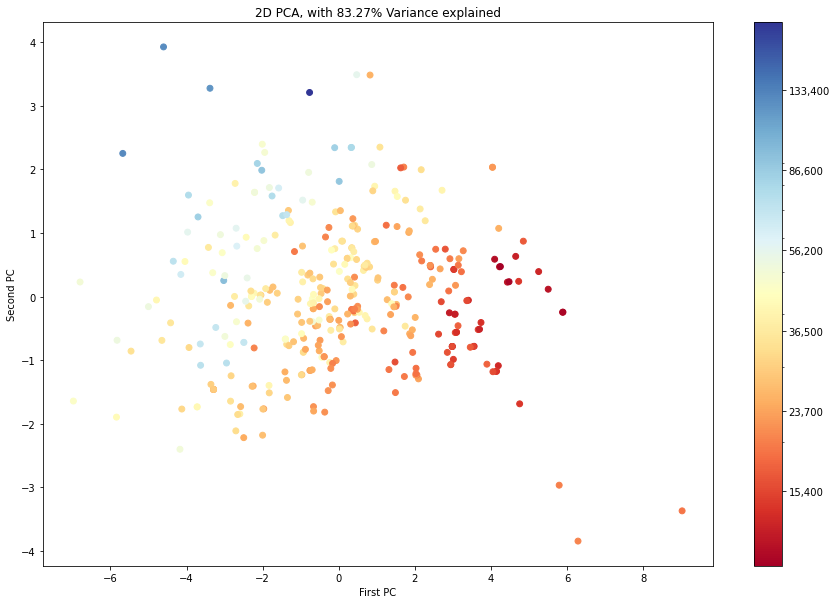

In [11]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(data_scaled[:,1:]) # Projects data into 2-dimensions, using the two highest PCs

#### Leave the plotting code as-is ####
from matplotlib.colors import LogNorm # use a logscale for better visualization
fig, ax = plt.subplots(figsize=(15,10))
price = data[:,0] # the first column contains our (unscaled) prices
cm = plt.cm.get_cmap('RdYlBu') # what colormap type we want (red->yellow->blue)
sc = ax.scatter(X_pca[:,0], X_pca[:,1], 
                 norm=LogNorm(vmin=price.min(), vmax=price.max()), 
                 c=price, s=35, cmap=cm) # scatterplot, with color

cbar = fig.colorbar(sc, ticks=np.logspace(4., 5.5, num=9)) # add a bar for reference
cbar.ax.set_yticklabels(['{:,.0f}'.format(i) for i in np.round(np.logspace(4., 5.5, num=9),-2)])# what bar ticks to have

ax.set_title("2D PCA, with "+'{0:.2%}'.format(pca.explained_variance_ratio_.sum())+" Variance explained")
ax.set_ylabel("Second PC")
ax.set_xlabel("First PC")
#####################################

In [8]:
pca.components_

array([[-0.36824328, -0.34692935, -0.30604987,  0.33252128,  0.3297765 ,
        -0.36914198, -0.30833885, -0.29595003, -0.33484679],
       [ 0.09989972,  0.17894469,  0.36713201, -0.30626564, -0.3478437 ,
        -0.05687014, -0.49722216, -0.5182685 , -0.29891925],
       [ 0.3279035 ,  0.44529514,  0.44514335,  0.46002845,  0.48986697,
        -0.18372745, -0.04309934,  0.04172547, -0.08419481],
       [ 0.12488683, -0.05487945, -0.12494302,  0.34161122,  0.03208725,
         0.37756544, -0.2315366 , -0.49429623,  0.63840373],
       [-0.30352692, -0.46294753,  0.65962719, -0.11806921,  0.10482343,
        -0.21090751, -0.0999046 ,  0.13627308,  0.40060132]])

In [31]:
pca.singular_values_

array([52.43562789, 27.0014608 , 18.13407969, 11.75436066, 10.32441643,
        8.75238355,  7.37434293,  5.79044214,  5.0687423 ,  3.78288767,
        0.5530527 ])

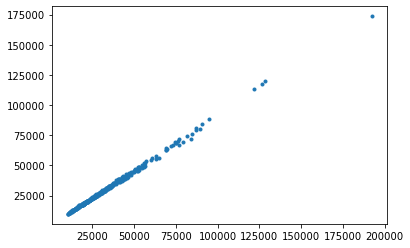

In [26]:
plt.plot(data[:,0], data[:,1],'.')

In [5]:
pca.components_
var=['Price', 'Engine size', 
      'Cylinders', 'HP', 'City MPG', 
      'Highway MPG', 'Weight', 'Wheel base', 
      'Length', 'Width']

Notice the trend/trends we see when we overlay prices? 
#### What structrure do you see in the Data? What is price's relationship to the PC's? (i.e. Interpret the above plot) (5pt)




## Step 1. Create a simple linear model (20pt)

Like before, find the appropriate function for linear regression (this time in the `sklearn.linear_model` submodule)
#### Complete the below code. (5pt)

In [4]:
from sklearn.linear_model import LinearRegression

# response are car prices, i.e., the first column of the data matrix #
y_train = data_scaled[:,0]
# covariates are the other columns. Dealer cost is not included since it correlates too much with the price #
X_train = data_scaled[:,1:]

ncv = 10 # number of cross valiation folds *KEEP THIS CONSTANT*

lin_reg = LinearRegression() #new "modelling" object
lin_reg.fit(X_train,y_train) # do the regresion on the above
yhat = lin_reg.predict(X_train) #predict prices based on the model


# Evaluate the models using crossvalidation
scores = cross_val_score(lin_reg,
    X_train, y_train, scoring="neg_mean_squared_error", cv=ncv)

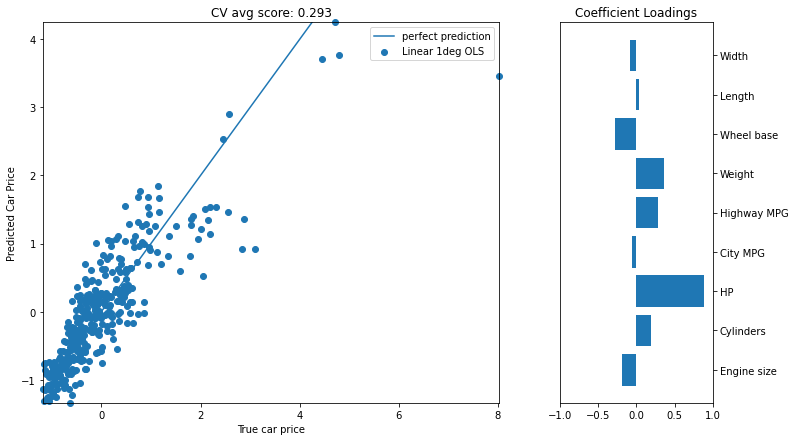

In [12]:
#### Leave the plotting code as-is ####
from matplotlib import gridspec
plt.figure(figsize=(12, 7))
gs = gridspec.GridSpec(1, 2, width_ratios=[3, 1]) 

ax = plt.subplot(gs[0])
plt.scatter(y_train, yhat, label="Linear 1deg OLS", clip_on=False)
plt.title("CV avg score: {:.3}".format(abs(scores.mean())))
plt.xlabel("True car price")
plt.ylabel("Predicted Car Price")
plt.xlim((min(y_train), max(y_train)))
plt.ylim((min(yhat), max(yhat)))
plt.plot(range(100000), label="perfect prediction")
plt.legend()

ax = plt.subplot(gs[1])
ypos = np.arange(len(var[1:]))
plt.barh(ypos, lin_reg.coef_, align='center')
plt.yticks(ypos, var[1:])
ax.yaxis.tick_right()
plt.title("Coefficient Loadings")
plt.xlim([-1,1])
fig.tight_layout(pad=1.9)
######################################

In [7]:
lin_reg.coef_

array([-0.19315161,  0.19309652,  0.88125059, -0.05718297,  0.27775606,
        0.36637783, -0.28270431,  0.0315081 , -0.08491507])

#### Discuss the plot (15pt): 
Is the model reasonable? For what range of prices is the prediction best? What does the CV score mean (should it be large or small)?

## Step 2. Now use the same code to create multiple models and compare (30pt)

#### Compare models using crossvalidation, AIC and BIC. Discuss how model complexity affects the training error and these model selection criteria. 

* Here we are making use of a neat API in sklearn called **Pipeline**. This let's us queue up a bunch of tasks and perform all of them, as long as the same target (y) is being used for all of them. We'll tell the pipeline to automatically generate the columns for some desired degree polynomial model, and then fit it using linear OLS.

* Once again, fill out the `?` by reading the docs. Use the linear OLS from the last problem, AND find sklearn's function for automatically generating the polynomial columns, in the `sklearn.preprocessing` submodule.

#### Complete the code (10pt)

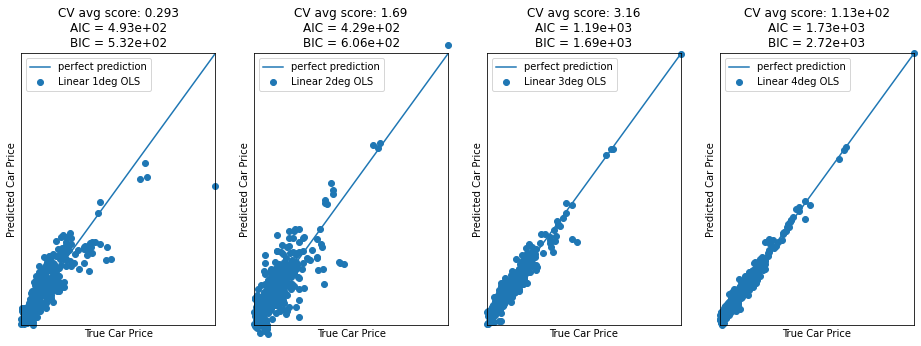

In [14]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures # find the module from sklearn.preprocessing that generates polynomial terms


# a set of linear models with polynomial terms
degrees = [1,2,3,4] # make a list of all degrees of polynomial models to try
scores = np.zeros((len(degrees),ncv)) # cv error, for each model type
error = np.zeros(len(degrees))

fig=plt.figure(figsize=(16, 5))

for i in range(len(degrees)):
    
    polynomial = PolynomialFeatures(degree=degrees[i],
                              include_bias=True,
                              interaction_only=True)
    lin_reg = LinearRegression() # our data has been scaled, no need for intercept

    pipeline = Pipeline([("Polynomial Features", polynomial),
                         ("Linear OLS", lin_reg)])
    pipeline.fit(X_train,y_train) # do the regresion on the above
    yhat = pipeline.predict(X_train) #predict prices based on the model

    # Evaluate the models using crossvalidation
    scores[i,] = cross_val_score(pipeline,
        X_train, y_train, scoring="neg_mean_squared_error", cv=ncv) # add the new CV scores
    
    # Calculate the training error
    error[i] = ((yhat - y_train)**2).sum()
    
    #### Leave the plotting code as-is ####
    n = yhat.shape[0]
    ax = plt.subplot(1, len(degrees), i + 1, sharey=ax)
    plt.setp(ax, xticks=(), yticks=())
    plt.scatter(y_train, yhat, label="Linear "+str(degrees[i])+"deg OLS", clip_on=False)
    plt.title("CV avg score: {:.3}\nAIC = {:.2e}\nBIC = {:.2e}".format(abs(scores[i,].mean()),
              2*polynomial.n_output_features_- n*np.log(error[i]/n) , 
              np.log(y_train.shape[0])*polynomial.n_output_features_- n*np.log(error[i]/n) ))

    plt.xlim((min(y_train), max(y_train)))
    plt.ylim((min(yhat), max(yhat)))
    plt.plot(range(100000), label="perfect prediction")
    
    plt.xlabel("True Car Price")
    plt.ylabel("Predicted Car Price")

    plt.legend()
#     fig.suptitle("Prediction and "+str(ncv)+" Cross-validation for polynomial fits (deg 1-4)")

#### Discuss the results (20 pt):
Based on the above, which model seems to be the "best"? What is happening as the model complexity increases?

# Step 3. Propose your own model and compare with the above ones (20pt)

#### Propose your own linear model (does not have to contain only polynomial terms). Report its crossvalidation, AIC and BIC scores. 

* HINT: We suggest taking a look at some of the trends you found in the PCA. Sometimes polynomial transformations of your data are not the best...
* ANYTHING in the form $$y = a_1 f_1({\bf x}) +a_2 f_2({\bf x}) + \cdots + a_n f_n({\bf x})$$ will work fine, but you will need $n$ columns in your matrix that you fit, with each column being the $f_i({\bf})$ transform. Think about how some of the variables should actually correlate. 
* If you're struggling to find a good model, try plotting histograms (remember HW1?) of the individual variables. If there are ranges with unusually large counts, you may or may not want to find a function that weights that variable accordingly. 

#### Now apply your model on the test data "dat_test.txt" and report the mean square error.

You will get at least 10pt if you correctly complete the code.

## (For curious readers) Example: LASSO 
Below is another linear regression method. You are not required to know how this works, but we wanted to show you what a slightly more sophisticated regression might look like. Here, we penalize having too many variables by adjusting a parameter $\alpha$ ($\alpha=0$ will return OLS exactly). The "best" $\alpha$ is found via cross-validation. Generally, when we can remove variables that are deemed useless, the prediction will behave better for previously unseen data. 

In [14]:
from sklearn.linear_model import LassoCV, Lasso

model=LassoCV(cv=ncv, fit_intercept=False) #alpha based on CV for ncv from above

model.fit(X_train, y_train)
yhat = model.predict(X_train)
print model.alpha_

scores = cross_val_score(model,
        X_train, y_train, scoring="neg_mean_squared_error", cv=ncv)
print "CV avg MSE ",-1*scores.mean()
print model.coef_

0.00360889898657
CV avg MSE  0.294257993476
[-0.13636932  0.15817986  0.87550364 -0.          0.19457779  0.29038555
 -0.23750489  0.00485722 -0.06564906]


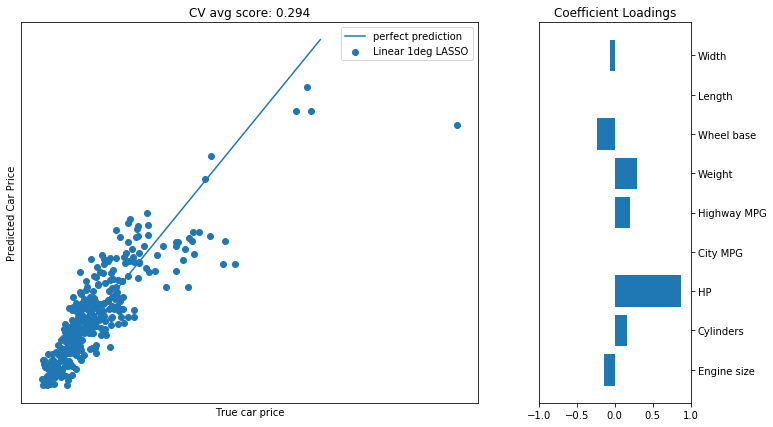

In [15]:
from matplotlib import gridspec
plt.figure(figsize=(12, 7))
gs = gridspec.GridSpec(1, 2, width_ratios=[3, 1]) 

ax = plt.subplot(gs[0])

plt.setp(ax, xticks=(), yticks=())
plt.scatter(y_train, yhat, label="Linear 1deg LASSO", clip_on=False)


plt.title("CV avg score: {:.3}".format(abs(scores.mean())))
plt.xlabel("True car price")
plt.ylabel("Predicted Car Price")
plt.plot(range(6), label="perfect prediction")
#plt.xlim((min(y), max(y)))
#plt.ylim((min(yhat), max(yhat)))
plt.legend()


ax = plt.subplot(gs[1])
ypos = np.arange(len(var[1:]))
plt.barh(ypos, model.coef_, align='center')
plt.yticks(ypos, var[1:])
ax.yaxis.tick_right()
plt.title("Coefficient Loadings")
plt.xlim([-1,1])
fig.tight_layout(pad=1.9)

2.44262527371


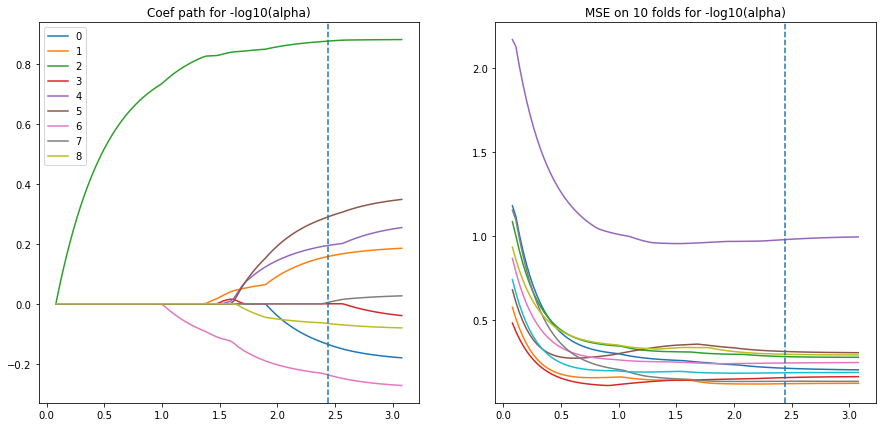

In [16]:
#print model.path(X,y)[1]
fig, ax=plt.subplots(ncols=2, figsize=(15,7))
print -np.log10(model.alpha_)
ax[0].plot(-np.log10(model.path(X_train, y_train)[0]), model.path(X_train,y_train)[1].T)
ax[0].legend([str(i) for i in range(9)], loc=0)
ax[0].axvline(x=-np.log10(model.alpha_), ls='--')
ax[0].set_title("Coef path for -log10(alpha)")
#ax[0].set_ylim((-5,5))
ax[1].plot(-np.log10(model.alphas_), model.mse_path_)
ax[1].axvline(x=-np.log10(model.alpha_), ls='--')
ax[1].set_title("MSE on "+str(ncv)+" folds for -log10(alpha)")

## Example Validation: 
This is where things get interesting: I'll import the test set that we've been saving this whole time. Unlike cross-validation, now our model has *never* seen this data, and won't be able to learn from it...we simply are testing it's prediction ability. 

Note that LASSO performs just slightly better. This is how we will check your model's predictive power!

(39L, 10L)


ValueError: shapes (39,9) and (256,) not aligned: 9 (dim 1) != 256 (dim 0)

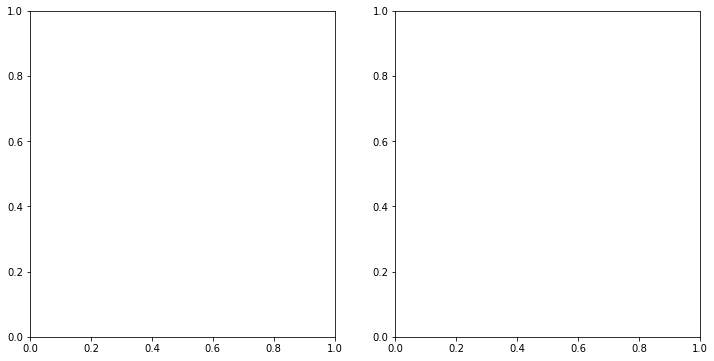

In [17]:
#import the test data
test = np.genfromtxt("dat_test.txt") 
print test.shape
test_scaled = scaler_func.transform(test)
Xt = test_scaled[:,1:]
#print test[:,1:].mean(axis=0)
yt_scale = test_scaled[:,0]
yt = test[:,0]

fig, ax = plt.subplots(ncols=2, figsize=(12, 6))
# First the Linear OLS
yhat_scale=lin_reg.predict(Xt)
yhat = yhat_scale*y.std()+y.mean()

ax[0].scatter(yt, yhat)
ax[0].plot(range(100000))
residual = np.sqrt(np.sum((yt-yhat)**2))
ax[0].set_title("OLS Residual: {:.3}".format(residual))

#Now the LASSO
yhat_scale=model.predict(Xt)
yhat = yhat_scale*y.std()+y.mean()


ax[1].scatter(yt, yhat)
ax[1].plot(range(100000))
residual = np.sqrt(np.sum((yt-yhat)**2))
ax[1].set_title("LASSO Residual: {:.3}".format(residual))

fig.tight_layout()

In [19]:
Xt.shape

(39L, 9L)